# Decision Tree Example (Penguins)

### Code to convert notebook into Python code
```shell
jupyter nbconvert --to script *.ipynb
```
### Dataset References: 
* Penguin dataset.  https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris
* Seaborn penguins dataset.  https://seaborn.pydata.org/introduction.html
* Kaggle IBM-HR notebooks.  https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/code?datasetId=1067&sortBy=voteCount
* Kaggle IBM-HR Decision Tree.  https://www.kaggle.com/hackspyder/decision-based-approach
* Kaggle IBM-HR Logistic Regression: https://www.kaggle.com/faressayah/ibm-hr-analytics-employee-attrition-performance

### Decision Tree References: 
* Scikit-Learn Decision Tree.  https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
* https://www.kaggle.com/hackspyder/decision-based-approach
* https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python
* https://github.com/pydot/pydot
* https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* https://mljar.com/blog/visualize-decision-tree/

In [1]:
# ! jupyter nbconvert --to script *.ipynb

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 999)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print('Seaborn version: ', sns.__version__)

Seaborn version:  0.11.0


In [3]:
# https://www.kaggle.com/hackspyder/decision-based-approach

from sklearn import tree

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [4]:
import os

In [5]:
# load penguins dataset
df_penguins_raw = sns.load_dataset("penguins")

print('Table shape: ', df_penguins_raw.shape, '\n')
print('Number of Uniques per column: ')
print(df_penguins_raw.nunique(), '\n')
print('Number of nulls per column: ')
print(df_penguins_raw.isna().sum(), '\n')
print('Dataframe info: ')
print(df_penguins_raw.info(), '\n')

df_penguins_raw.head()

Table shape:  (344, 7) 

Number of Uniques per column: 
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64 

Number of nulls per column: 
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64 

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
# make copy for cleaning
df_penguins = df_penguins_raw.copy()

In [7]:
# Clean up null values: .dropna() of target variable
df_penguins = df_penguins.dropna(subset=['sex'])

In [8]:
# Clean up null values: .fillna() of numeric variable using .mean()
df_penguins['bill_length_mm'].fillna(df_penguins['bill_length_mm'].mean(), inplace=True)
df_penguins['bill_depth_mm'].fillna(df_penguins['bill_depth_mm'].mean(), inplace=True)
df_penguins['flipper_length_mm'].fillna(df_penguins['flipper_length_mm'].mean(), inplace=True)
df_penguins['body_mass_g'].fillna(df_penguins['body_mass_g'].mean(), inplace=True)

In [9]:
# add categorical bin for numeric
df_penguins[f'group_body_mass'] = pd.cut(df_penguins['body_mass_g'], bins=3)

### Exploratory Data Analysis
* Pivot tables
* Grouped bar charts
* Scatterplots
* Histograms

In [10]:
# pivot table to count categorical columns: island vs. gender
# values='species' is any column without nulls
# index='island' is column to put in rows
# margins=True means to include totals
# .sort_values('All') means sort by index totals
pt_island_gender = pd.pivot_table(df_penguins, values='species', index='island', columns='sex', aggfunc=len, margins=True).fillna(0).sort_values('All', ascending=False)
pt_island_gender

sex,Female,Male,All
island,,,
All,165,168,333
Biscoe,80,83,163
Dream,61,62,123
Torgersen,24,23,47


In [11]:
# pivot table to count categorical columns: species vs. gender
pt_island_gender = pd.pivot_table(df_penguins, values='island', index='species', columns='sex', aggfunc=len, margins=True).fillna(0).sort_values('All', ascending=False)
pt_island_gender

sex,Female,Male,All
species,,,
All,165,168,333
Adelie,73,73,146
Gentoo,58,61,119
Chinstrap,34,34,68


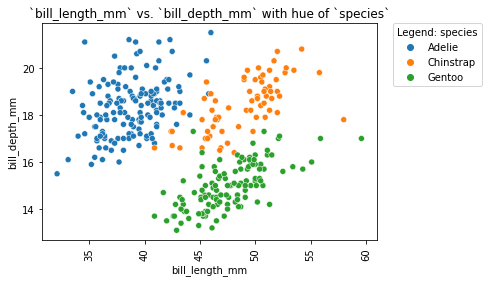


Wall time: 321 ms


In [12]:
%%time

x='bill_length_mm'
y='bill_depth_mm'
hue='species'
data=df_penguins

sns.scatterplot(data=data, x=x, y=y, hue=hue, x_jitter=True)

# put a title
plt.title(f"`{x}` vs. `{y}` with hue of `{hue}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: {hue}", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
print()

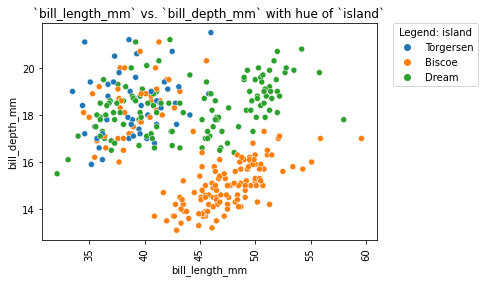


Wall time: 284 ms


In [13]:
%%time

x='bill_length_mm'
y='bill_depth_mm'
hue='island'
data=df_penguins

sns.scatterplot(data=data, x=x, y=y, hue=hue, x_jitter=True)

# put a title
plt.title(f"`{x}` vs. `{y}` with hue of `{hue}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: {hue}", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
print()

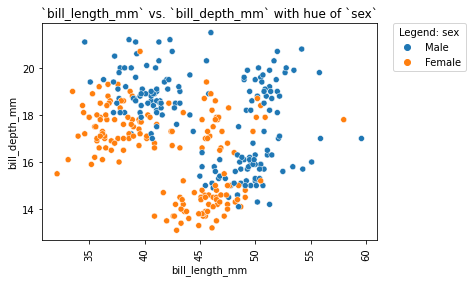


Wall time: 270 ms


In [14]:
%%time

x='bill_length_mm'
y='bill_depth_mm'
hue='sex'
data=df_penguins

sns.scatterplot(data=data, x=x, y=y, hue=hue, x_jitter=True)

# put a title
plt.title(f"`{x}` vs. `{y}` with hue of `{hue}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: {hue}", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
print()

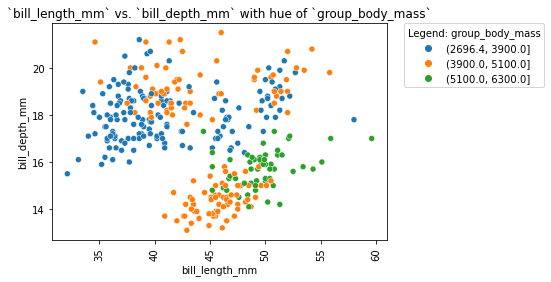


Wall time: 313 ms


In [15]:
%%time

x='bill_length_mm'
y='bill_depth_mm'
hue='group_body_mass'
data=df_penguins

sns.scatterplot(data=data, x=x, y=y, hue=hue, x_jitter=True)

# put a title
plt.title(f"`{x}` vs. `{y}` with hue of `{hue}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: {hue}", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
print()

In [16]:
def plot_gb_pct_total(gb_col_name, str_col_name, df_input):
    '''
    Create groupby % of total based on two categorical variables.
    
    Input examples:
        gb_col_name = 'SUB'
        str_col_name = 'CATEGORY'
    '''
    
    dfu = df_input.groupby([gb_col_name])[str_col_name].value_counts(dropna=False, normalize=True).unstack().T
    dfu = dfu.sort_values(dfu.columns[0], ascending=False)

    # plot
    dfu.plot.bar(figsize=(7, 5))
    # ax = sns.barplot(x=gb_col_name, y=str_col_name, data=dfu)
    plt.title(f"Grouped barchart: % of Total by `{str_col_name}`, groupby `{gb_col_name}`")
    plt.legend(title=gb_col_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(str_col_name)
    plt.ylabel('% of Total')
    plt.show()
    
    print('\n')
    print(dfu)

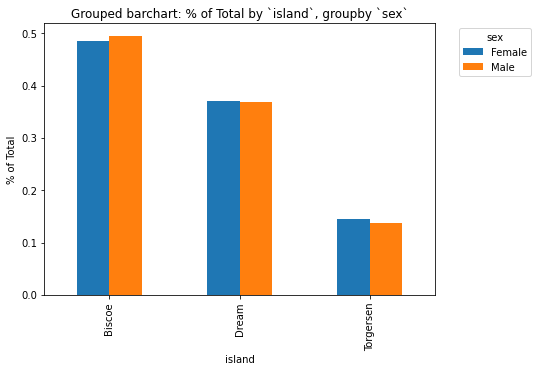



sex          Female      Male
island                       
Biscoe     0.484848  0.494048
Dream      0.369697  0.369048
Torgersen  0.145455  0.136905


In [17]:
# Check balanced categories: gender vs. island
plot_gb_pct_total(
    gb_col_name = 'sex', 
    str_col_name = 'island', 
    df_input = df_penguins
)

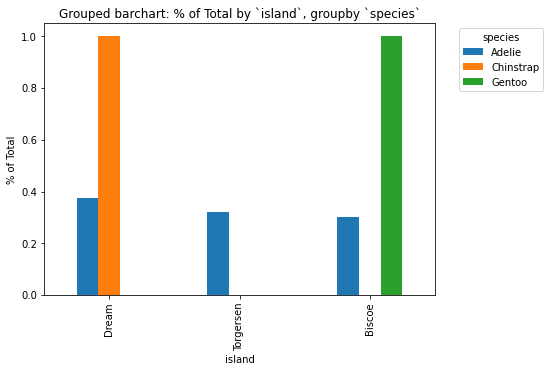



species      Adelie  Chinstrap  Gentoo
island                                
Dream      0.376712        1.0     NaN
Torgersen  0.321918        NaN     NaN
Biscoe     0.301370        NaN     1.0


In [18]:
# Check balanced categories: species vs. island
# species `Adelie` is balanced across islands
# species `Chinstrap` is unbalanced, only in island `Dream`
# species `Gentoo` is unbalanced, only in island `Biscoe`
plot_gb_pct_total(
    gb_col_name = 'species', 
    str_col_name = 'island', 
    df_input = df_penguins
)

In [19]:
# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g

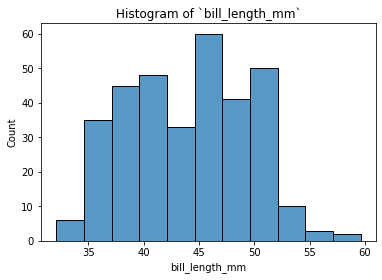

In [20]:
x="bill_length_mm"
sns.histplot(data=df_penguins, x=x)

# put a title
plt.title(f"Histogram of `{x}`")

plt.show()

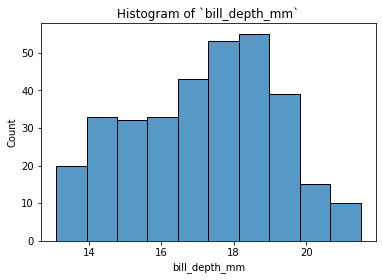

In [21]:
x="bill_depth_mm"
sns.histplot(data=df_penguins, x=x)

# put a title
plt.title(f"Histogram of `{x}`")

plt.show()

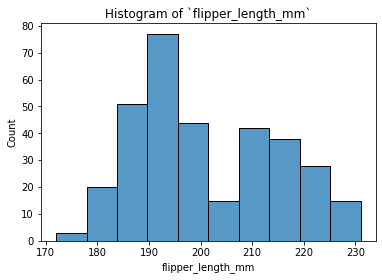

In [22]:
x="flipper_length_mm"
sns.histplot(data=df_penguins, x=x)

# put a title
plt.title(f"Histogram of `{x}`")

plt.show()

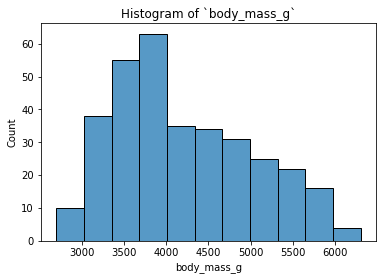

In [23]:
x="body_mass_g"
sns.histplot(data=df_penguins, x=x)

# put a title
plt.title(f"Histogram of `{x}`")

plt.show()

### Encode Columns (Categorical vs. Numeric)

In [24]:
def encode_columns_split(
    in_df, 
    in_ls_cols_numeric, 
    in_str_target_variable,
    in_ls_cols_drop=['blank_drop_xyz'], 
    drop_cols=True
):
    '''
    Split the dataset column-wise into 4 subsets:
        * Categorical columns
        * Numeric columns
        * Target variable
        * Drop columns
        
    Inputs:
        * in_df - dataframe, input data
        * in_ls_cols_numeric - list, columns with numeric data
        * in_str_target_variable - list, columns with categorical data
        * in_ls_cols_drop - list, columns to drop from dataset
        * drop_cols=True
    Return:
        * temp_df_final - dataframe, merge numeric columns and categorical columns (one-hot-encoding)
        * target_var_output - series, output column from dataframe
        * target_output_categories - series, unique alphabetical output categories
    '''
    
    print("Input dataframe shape: ", in_df.shape)
    print("in_ls_cols_numeric: ", in_ls_cols_numeric)
    print("in_str_target_variable: ", in_str_target_variable)
    print("in_ls_cols_drop: ", in_ls_cols_drop)
    print()
    
    
    # ============================================================
    # create list of categoric, numeric columns
    # ============================================================
    
    # create list with numeric and target variable
    temp_ls_cols_numeric_target = in_ls_cols_numeric+[in_str_target_variable]
    print("temp_ls_cols_numeric_target", temp_ls_cols_numeric_target)
    print()
    
    
    # create list of categorical columns (exclude the numeric columns and the target variable)
    temp_ls_cols_cat = in_df.columns.difference(temp_ls_cols_numeric_target)
    print("temp_ls_cols_cat: ", temp_ls_cols_cat)
    print()
    
    # ============================================================
    # create output vector (target variable), and unique list of output categories
    # ============================================================
    
    # create output vector (target variable)
    target_var_output = in_df[in_str_target_variable]
    print("Length of target_var_output: ", len(target_var_output))
    print()
    
    # create list of output categories
    target_output_categories = sorted(in_df[in_str_target_variable].value_counts().index)
    print("target_output_categories: ", target_output_categories)
    print()
    
    # ============================================================
    # use this dataframe for remaining code, rather than input df
    # ============================================================
    
    # drop the target variable from the training data
    temp_df_drop = in_df.drop([in_str_target_variable], axis=1)
    print("Shape temp_df_drop: ", temp_df_drop.shape)
    
    # create numeric dataframe
    temp_df_num = temp_df_drop[in_ls_cols_numeric]
    print("Shape temp_df_num: ", temp_df_num.shape)
    
    # create categoric dataframe 
    temp_df_cat_raw = temp_df_drop[temp_ls_cols_cat]
    print("Shape temp_df_cat_raw: ", temp_df_cat_raw.shape)
    
    # modify categoric dataframe to drop some columns
    temp_ls_cat_drop = [x for x in temp_df_cat_raw.columns if x not in in_ls_cols_drop]
    temp_df_cat_drop = temp_df_cat_raw[temp_ls_cat_drop]
    print("Shape temp_df_cat_drop: ", temp_df_cat_drop.shape)
        
    # convert the categorical dataframe, encoded as numeric, using "one-hot-encoding"
    temp_df_cat = pd.get_dummies(temp_df_cat_drop)
    print("Shape temp_df_cat: ", temp_df_cat.shape)
    
    # Concat the two dataframes together columnwise
    temp_df_final = pd.concat([temp_df_num, temp_df_cat], axis=1)
    print("Shape temp_df_final: ", temp_df_final.shape)
    
    return temp_df_final, target_var_output, target_output_categories

In [25]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,group_body_mass
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,"(2696.4, 3900.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,"(2696.4, 3900.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,"(2696.4, 3900.0]"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,"(2696.4, 3900.0]"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,"(2696.4, 3900.0]"


In [26]:
# ===================================================
# Prepare for model: Total dataset
# ===================================================

# create list of numeric columns
ls_cols_numeric = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
]

# prepare the data for the decision tree model
df_final_out, ls_target_train_out, ls_target_categories_out = encode_columns_split(
    df_penguins, 
    in_ls_cols_numeric=ls_cols_numeric,
    in_str_target_variable='sex',
    in_ls_cols_drop=['group_body_mass'],
    drop_cols=True
)

Input dataframe shape:  (333, 8)
in_ls_cols_numeric:  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
in_str_target_variable:  sex
in_ls_cols_drop:  ['group_body_mass']

temp_ls_cols_numeric_target ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

temp_ls_cols_cat:  Index(['group_body_mass', 'island', 'species'], dtype='object')

Length of target_var_output:  333

target_output_categories:  ['Female', 'Male']

Shape temp_df_drop:  (333, 7)
Shape temp_df_num:  (333, 4)
Shape temp_df_cat_raw:  (333, 3)
Shape temp_df_cat_drop:  (333, 2)
Shape temp_df_cat:  (333, 6)
Shape temp_df_final:  (333, 10)


In [27]:
def build_decision_tree(train, target_train, tree_feature_names, tree_class_names, str_filename_output):
    '''
    Prepare the data input and model parameters to the model.  Build decision tree.
    
    Inputs:
        * train - dataframe, no need to split dataset for decision tree, just use everything
        * target_train - list, single dataframe column of output or target variable
        * tree_feature_names - list, columns from dataframe
        * tree_class_names - sorted list of output categories
        * str_filename_output - str, prefix for filename output (e.g. dot-file, png-file)
    Model hyper-parameters, hard-coded:
        * tree_max_depth = 3
        * tree_filled = True
        * tree_impurity = False
        * tree_node_ids = True
        * tree_proportion = False
        * tree_rounded = True
        * tree_fontsize = 12
    Outputs, create local files:
        * dot-file
        * png-file
    '''
    
    # =============================================
    # Model input parameters
    # =============================================
    
    # use the "df_final" dataframe ... has been encoded (numeric), removed nulls, removed target variable
    # for now, put everything in a training dataset, ignore the train/test split dataset
    # this is like capital "X"
    train = train    # this is like capital "X"
    
    # use the "emp_status" column from the original dataset as the target variable
    target_train = target_train    # this is like lowercase "y"
    
    # use the column names from the "df_final" dataframe for list of features
    tree_feature_names = tree_feature_names
    
    # use the values in the target variable for class_names ... this list needs to be sorted ascending
    tree_class_names = sorted(tree_class_names)
    
    # =============================================
    # Model hyper-parameters
    # =============================================
    
    # store other model variables
    tree_max_depth = 3
    tree_filled = True
    tree_impurity = False
    tree_node_ids = True
    tree_proportion = False
    tree_rounded = True
    tree_fontsize = 12
    
    print('Total number of features used in model: ', len(tree_feature_names))
    print('First 5 feature names: ', tree_feature_names[:5])
    print('Class names: ', tree_class_names)
    
    # =============================================
    # Model training
    # =============================================
    
    # instantiate and fit the Decision Tree Classifier
    decision_tree = tree.DecisionTreeClassifier(max_depth = tree_max_depth)
    decision_tree.fit(train, target_train)
    
    # =============================================
    # Model output filenames and paths
    # =============================================
    
    # build string for output filenames: .dot and .png
    # include the tree depth as part of filename
    # include today's date as part of the filename
    str_date_today = str(pd.Timestamp.now().date())
    str_filename_output = str_filename_output
    str_filename_dotfile = f"{str_date_today}_{str_filename_output}_depth{tree_max_depth}.dot"
    str_filename_pngfile = f"{str_date_today}_{str_filename_output}_depth{tree_max_depth}.png"

    # path folder and filename
    str_folder_decisiontree = 'output-decision-trees'
    if not os.path.exists(str_folder_decisiontree):
        os.makedirs(str_folder_decisiontree)
        
    # create path to .dot and .png files
    str_pathfile_dotfile = os.path.join(str_folder_decisiontree, str_filename_dotfile)
    str_pathfile_pngfile = os.path.join(str_folder_decisiontree, str_filename_pngfile)
    
    print(str_pathfile_dotfile)
    print(str_pathfile_pngfile)
    
    
    
    # =============================================
    # output dot-file
    # =============================================
    
    # Export our trained model as a .dot file
    with open(str_pathfile_dotfile, 'w') as f:
        f = tree.export_graphviz(
            decision_tree,
            out_file=f,
            max_depth = tree_max_depth,
            impurity = tree_impurity,
            feature_names = tree_feature_names,
            class_names = tree_class_names,
            rounded = tree_rounded,
            filled= tree_filled 
        )
        
    # =============================================
    # output png-file
    # =============================================

    plt.figure(figsize=(40,20))  # customize according to the size of your tree

    _ = tree.plot_tree(
        decision_tree, 
        max_depth = tree_max_depth,
        feature_names = tree_feature_names,
        class_names = tree_class_names,
        filled = tree_filled,
        impurity = tree_impurity,
        proportion = tree_proportion,
        node_ids = tree_node_ids,
        rounded = tree_rounded,
        fontsize = tree_fontsize
    )

    # saving the file.Make sure you 
    # use savefig() before show().
    plt.savefig(str_pathfile_pngfile)

    plt.show()

Total number of features used in model:  10
First 5 feature names:  ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'body_mass_g'
 'island_Biscoe']
Class names:  ['Female', 'Male']
output-decision-trees\2021-06-23_tree1_depth3.dot
output-decision-trees\2021-06-23_tree1_depth3.png


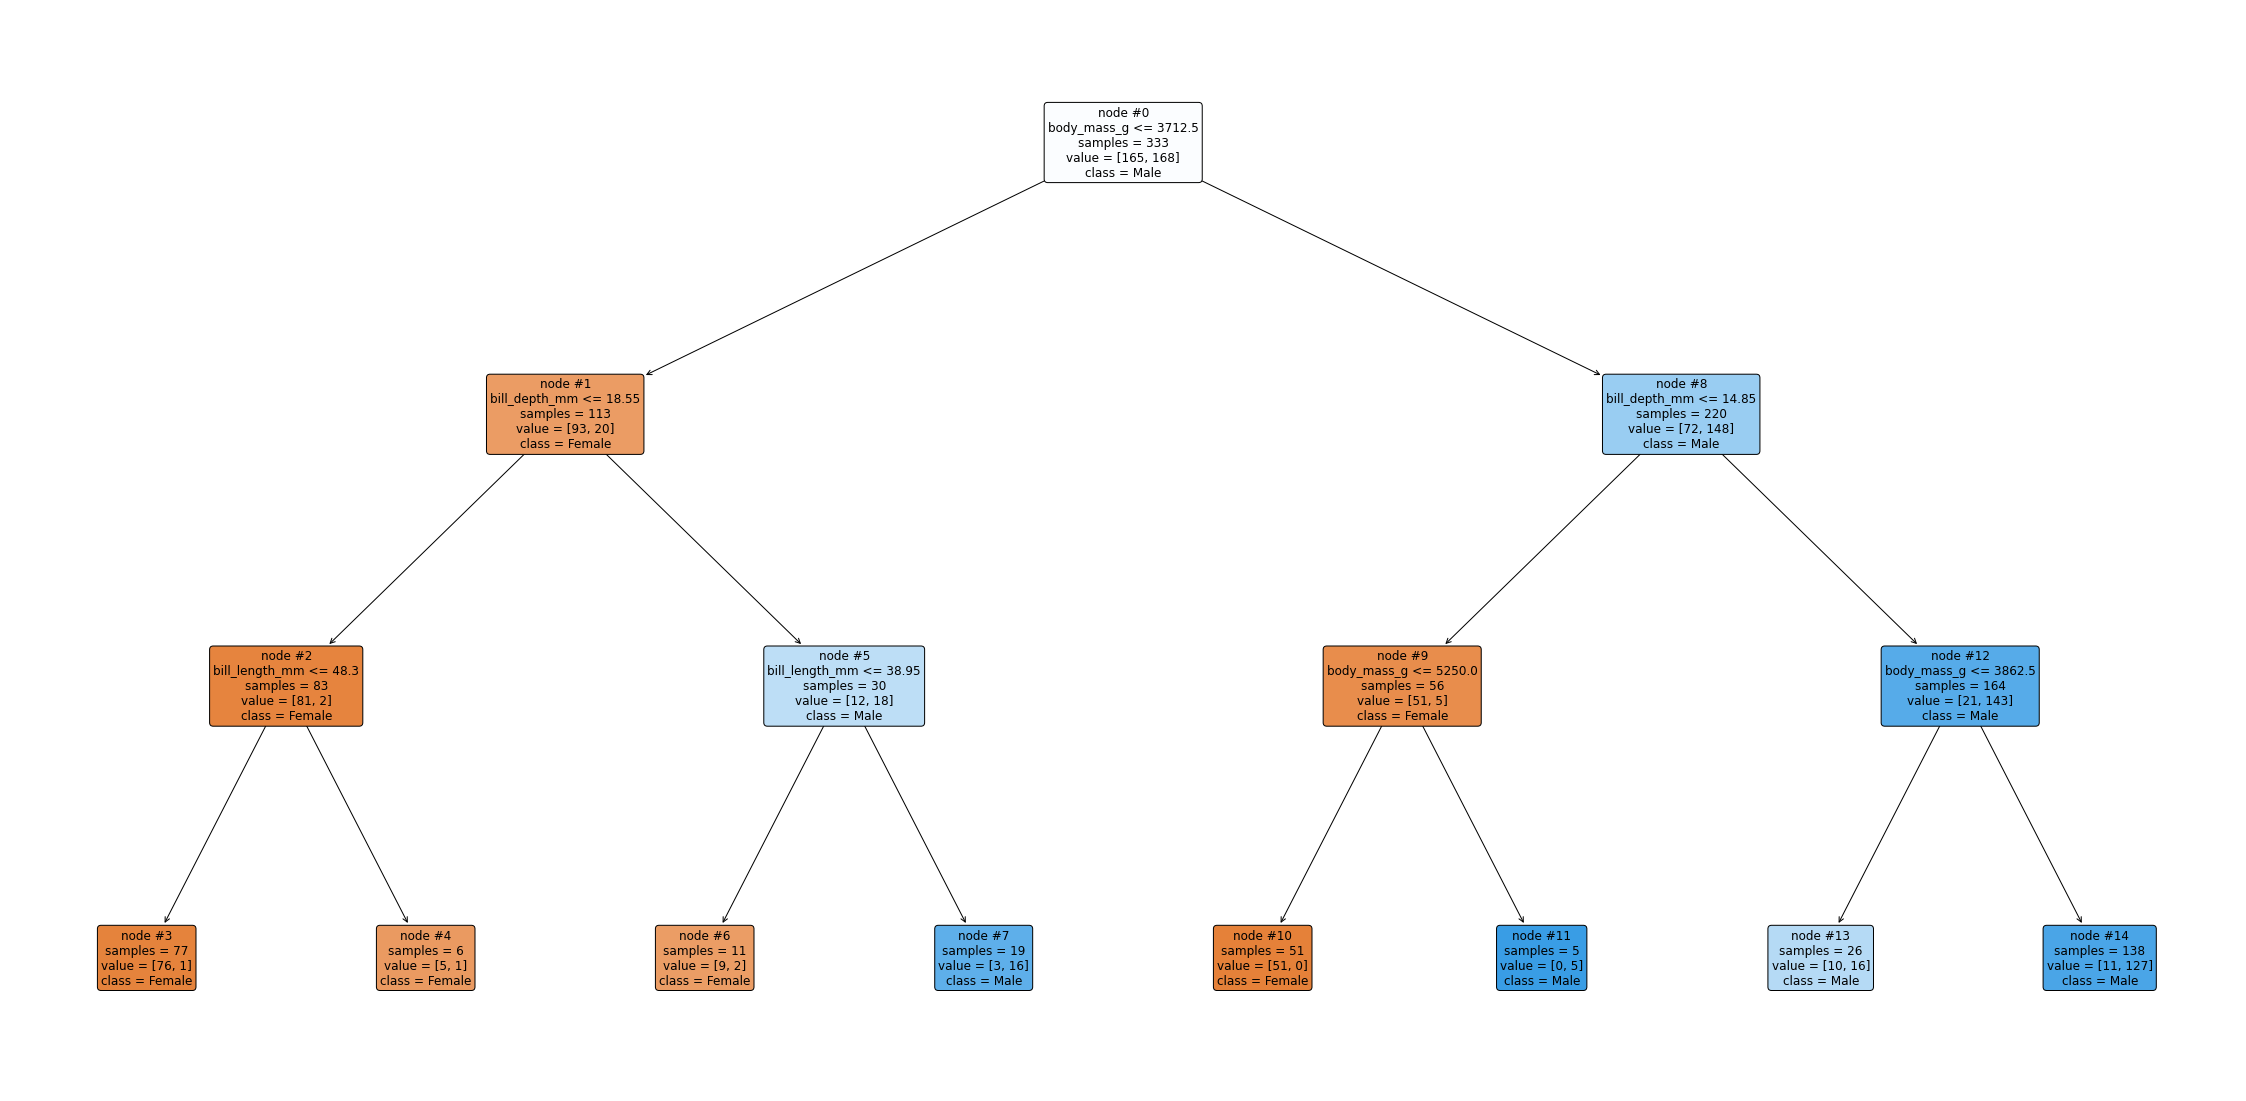

In [28]:
# ===================================================
# Build decision tree model: total dataset
# ===================================================

build_decision_tree(
    train = df_final_out,
    target_train = ls_target_train_out, 
    tree_feature_names = df_final_out.columns.values,
    tree_class_names = ls_target_categories_out,
    str_filename_output = "tree1"
)

### Logistic Regression Model
* Test size
* Random state
* Hyperparameters

In [29]:
from sklearn import preprocessing

from sklearn.metrics import accuracy_score

In [30]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# scorers used for GridSearchCV
from sklearn.metrics import SCORERS
# print(sorted(sklearn.metrics.SCORERS.keys()))
print("Scikit-learn Metrics SCORERS: ")
print(sorted(SCORERS.keys()))

# Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# for the uniform method
import scipy.stats as stats

Scikit-learn Metrics SCORERS: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [31]:
# Uppercase "X" is input matrix (matrix is multiple columns for input)
X = df_final_out

# Lowercase "y" is output vector (vector is single column for output)
y = ls_target_train_out

In [32]:
# =======================================================
# Split our dataset into training data vs. test data
# =======================================================

# training data is data used to help the model learn
# test data is data to evaluate whether the model did a good job learning
# Ignore for now: validation data ... subset of training data that helps "tune" the model
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

In [33]:
# scale the training data and transform, otherwise .fit() method fails
scaler = preprocessing.StandardScaler().fit(X_train_split)
X_train_scaled = scaler.transform(X_train_split)

# use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test_split)

X_test_scaled[:5]

array([[ 1.54740711,  1.32000266, -0.27346644, -0.59854326, -0.9375672 ,
         1.27199746, -0.42043748, -0.86710997,  1.88908111, -0.73691679],
       [-1.21678992,  0.65682667, -0.13060169,  0.31956457, -0.9375672 ,
         1.27199746, -0.42043748,  1.15325626, -0.52935789, -0.73691679],
       [-1.85328265, -0.05736286, -1.13065498, -0.99638999, -0.9375672 ,
         1.27199746, -0.42043748,  1.15325626, -0.52935789, -0.73691679],
       [ 1.14732596, -0.66952532,  1.72664014,  1.45189757,  1.06659021,
        -0.78616509, -0.42043748, -0.86710997, -0.52935789,  1.35700531],
       [ 0.92909988,  1.3710162 ,  0.15512782, -0.20069653, -0.9375672 ,
         1.27199746, -0.42043748, -0.86710997,  1.88908111, -0.73691679]])

In [34]:
# instantiate logistic regression classifier (raw template)
clf_lg = LogisticRegression(random_state=0)

# fit the logistic regression classifier
clf_lg_fit = clf_lg.fit(X_train_scaled, y_train_split)

In [35]:
# predict using the trained model -> run it on the test data that has been scaled
clf_lg_predict = clf_lg_fit.predict(X_test_scaled)
clf_lg_predict

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male'], d

In [36]:
# accuracy_score(y_true, y_pred)
accuracy_score(y_test_split, clf_lg_predict)

0.94

In [37]:
# create dictionary to encode target variables
di_target_encoding = {'Male': 0, 'Female': 1}

In [38]:
# some of the metrics require the class labels to be encoded as numeric
y_train_encoded_0_1 = y_train_split.replace(di_target_encoding)

print(len(y_train_encoded_0_1))
y_train_encoded_0_1[:5]

233


28     1
234    1
48     1
199    0
169    1
Name: sex, dtype: int64

In [39]:
# some of the metrics require the class labels to be encoded as numeric
y_test_encoded_0_1 = y_test_split.replace(di_target_encoding)

print(len(y_test_encoded_0_1))
y_test_encoded_0_1

100


156    0
133    0
92     1
267    0
209    0
      ..
290    1
103    0
322    1
101    0
316    0
Name: sex, Length: 100, dtype: int64

In [40]:
# https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

# input parameters
X_train = X_train_scaled
y_train = y_train_encoded_0_1
X_test = X_test_scaled
y_test = y_test_encoded_0_1

# instantiate model
clf = LogisticRegression()

In [41]:
# create grid values in a dictionary
grid_values = {'penalty': ['l1', 'l2'],'C':[0.0001,0.001,.009,0.01,.09,1,5,10,25]}

# use grid search: based on classifier, search grid_values, cross-validate (5-fold)
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv = 5, verbose = True, n_jobs = -1, scoring = 'precision')    # F1 0.09

# fit the model to the training data
grid_clf_acc.fit(X_train, y_train)

# Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print('Best estimator: ', grid_clf_acc.best_estimator_)
print('Best parameters: ', grid_clf_acc.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy Score : 0.94
Precision Score : 0.94
Recall Score : 0.94
F1 Score : 0.94
Best estimator:  LogisticRegression(C=25)
Best parameters:  {'C': 25, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished


['Female', 'Male']



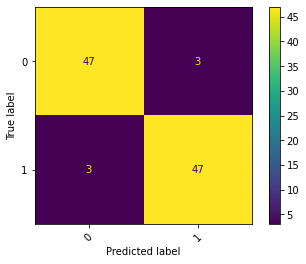

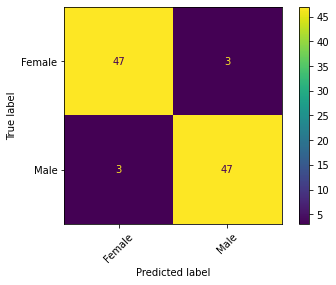

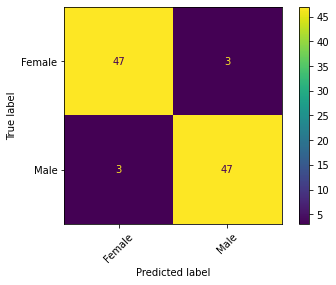

In [42]:
# =========================================================
# Print out the Confusion Matrix
# =========================================================

# Logistic Regression (Grid Search) Confusion matrix
cm = confusion_matrix(y_test,y_pred_acc, labels=[0, 1])

ls_sorted_classes = sorted(set(di_target_encoding.keys()))
print(ls_sorted_classes)
print()

plot_confusion_matrix(grid_clf_acc, X_test, y_test)  
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()  
print()

plot_confusion_matrix(grid_clf_acc, X_test, y_test, display_labels=ls_sorted_classes)  
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()  
print()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls_sorted_classes)
disp.plot() 
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
print()

### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
print(df_penguins.shape)

df_penguins.head()

(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,group_body_mass
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,"(2696.4, 3900.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,"(2696.4, 3900.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,"(2696.4, 3900.0]"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,"(2696.4, 3900.0]"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,"(2696.4, 3900.0]"


In [48]:
# create input matrix and output vector (all are numeric data)
X = df_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df_penguins['body_mass_g']

In [49]:
# split the data into train vs. test, input vs. output
X_train_regressor, X_test_regressor, y_train_regressor, y_test_regressor = train_test_split(X, y, test_size=0.30, random_state=1)

In [55]:
# linear regression
regressor = LinearRegression()
regressor.fit(X_train_regressor, y_train_regressor)

# score and coefficients
regressor_score = regressor.score(X_train_regressor, y_train_regressor)
regressor_coef = regressor.coef_
regressor_y_intercept = regressor.intercept_

print(f'regressor_score: {regressor_score} \n')
print(f'regressor_coef: {regressor_coef} \n')
print(f'regressor_y_intercept: {regressor_y_intercept} \n')

# Predicting the Test set results
y_pred = regressor.predict(X_test_regressor)

regressor_score: 0.7806135374019917 

regressor_coef: [ 6.76095074 12.28077498 48.37696758] 

regressor_y_intercept: -6004.7764465808 



In [56]:
# Output predictions
y_pred

array([3785.91082946, 4524.46522499, 3993.17389817, 3745.39689807,
       4989.1651977 , 4340.87768693, 3027.83172958, 3568.98597745,
       4565.58624766, 3993.50563269, 4142.91335378, 3705.53672253,
       3352.68544748, 3778.04403448, 4551.24733067, 3475.18464789,
       4725.14844386, 3767.53027042, 3934.46469039, 3713.69088982,
       4766.41864373, 4130.06942677, 4050.27340027, 3217.82008349,
       4126.1794518 , 3425.51290137, 4972.67576224, 3923.71575004,
       5062.62626384, 4492.24595835, 4124.94761552, 4522.31282712,
       5102.42307376, 3792.82344727, 5073.81800236, 4052.67402344,
       3588.60954238, 4400.45944204, 3672.86203169, 3804.5507834 ,
       4338.56245237, 5268.47044097, 4676.54977195, 3984.88111281,
       4750.90906046, 4643.83405472, 4067.03861547, 3575.74880758,
       3976.76985131, 4834.60956735, 3802.86873813, 3883.60401339,
       3681.22339788, 4958.50574308, 4972.74434306, 4643.33760412,
       4978.54037   , 4412.65901015, 5581.08586672, 5611.88248

In [58]:
# create dataframe comparing actual to predictions
df_regressor_output = pd.DataFrame({'Actual': y_test_regressor, 'Predicted': y_pred})
df_regressor_output

,Actual,Predicted
65,3950.0,3785.910829
276,4300.0,4524.465225
186,3600.0,3993.173898
198,3400.0,3745.396898
293,5200.0,4989.165198
...,...,...
44,3000.0,3402.662831
123,3875.0,4274.468703
84,3350.0,3706.005619
133,4475.0,4102.970092


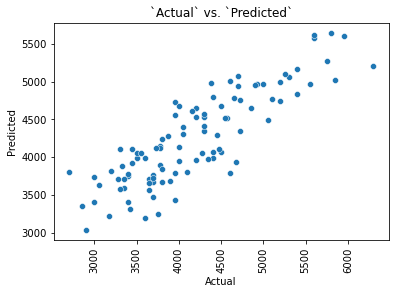


Wall time: 184 ms


In [59]:
%%time

x='Actual'
y='Predicted'
data=df_regressor_output

sns.scatterplot(data=data, x=x, y=y, x_jitter=True)

# put a title
plt.title(f"`{x}` vs. `{y}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

plt.show()
print()

In [44]:
# ! jupyter nbconvert --to script *.ipynb